In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr
import numpy as np
from urllib.request import urlopen
from sqlalchemy import create_engine
import json

import requests

xr_df = xr.open_dataset('Resources/gistemp1200_GHCNv4_ERSSTv5.nc.gz')
xr_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1703, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2021-11-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2021-12-10 10:06:01 by SBBX_to_nc 2.0 - ILAND=1200,...

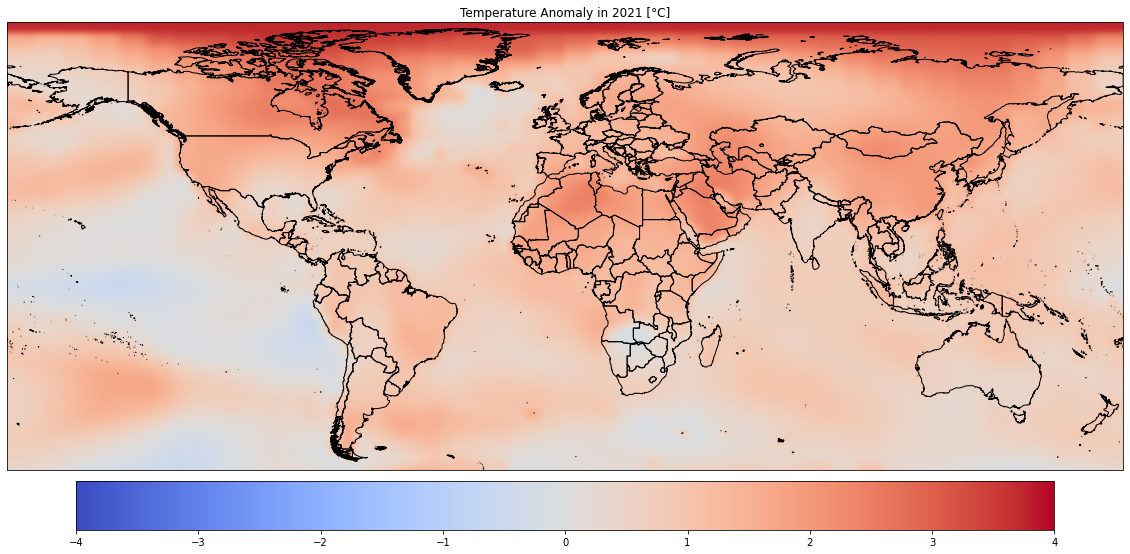

In [18]:
# We want to get the time into yearly frequency in order to make it into a static image that represents 2021.
climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

# Create a static image that shows global warming for the year of 2021.
# Variable needs to be named cbar_kwargs otherwise it will come up in error.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
               cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.savefig("global_map.png", bbox_inches='tight', dpi=150)
plt.show()

In [11]:
# Need ,encoding='cp1252' to pass otherwise error.
environment_df = pd.read_csv("Resources/Environment_Temperature_change_E_All_Data_NOFLAG.csv",encoding='cp1252')
environment_df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2.0,Afghanistan,7001.0,January,7271.0,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2.0,Afghanistan,7001.0,January,6078.0,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2.0,Afghanistan,7002.0,February,7271.0,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2.0,Afghanistan,7002.0,February,6078.0,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2.0,Afghanistan,7003.0,March,7271.0,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [12]:
temp1969 = environment_df["Y1969"].mean()
temp1979 = environment_df["Y1979"].mean()
temp1989 = environment_df["Y1989"].mean()
temp1999 = environment_df["Y1999"].mean()
temp2009 = environment_df["Y2009"].mean()
temp2019 = environment_df["Y2019"].mean()

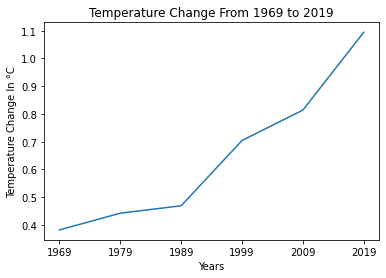

In [13]:
# Graph showing how the general temperature worldwide has gone by one degree in celcius.
spanbyTenYears = [temp1969, temp1979, temp1989, temp1999, temp2009, temp2019]
yearsonChart = ["1969", "1979", "1989", "1999", "2009", "2019"]
plt.plot(yearsonChart, spanbyTenYears)
plt.title("Temperature Change From 1969 to 2019")
plt.xlabel("Years")
plt.ylabel("Temperature Change In °C")
plt.show()

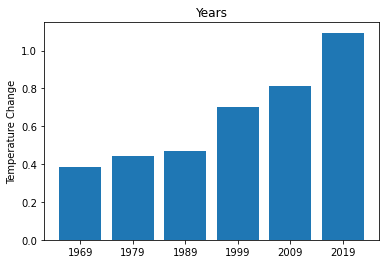

In [14]:
varYearBarChart = ("1969", "1979", "1989", "1999", "2009", "2019")
y_pos = np.arange(len(varYearBarChart))
varTempChange = [temp1969, temp1979, temp1989, temp1999, temp2009, temp2019]

plt.bar(y_pos, varTempChange, align='center', alpha=1)
plt.xticks(y_pos, varYearBarChart)
plt.ylabel('Temperature Change')
plt.title('Years')

plt.show()

In [15]:
import plotly.graph_objects as go

In [16]:
import plotly.express as px

fig = px.line(environment_df, x = 'Area', y = 'Y1963', title='Temperature Emissions By Region')
fig.show()